In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, auc, roc_auc_score, roc_curve, f1_score, confusion_matrix
import spacy
import re

In [2]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# The regex below can be modified later on.
def lemmatize(article):
    article = re.sub(r'http\S+', '', article)
    article = re.sub(r"#(\w+)", '', article)
    article = re.sub(r"@(\w+)", '', article)
    article = re.sub(r'[^\w\s]', '', article)
    article = re.sub(r'\w*\d\w*','', article)
    article = re.sub(' +',' ', article)
    article = article.strip().lower()
    
    doc = nlp(article)
    lemmatized_article = " ".join([token.lemma_ for token in doc if (token.is_stop==False)]) 
    
    return lemmatized_article

In [31]:
data = pd.read_csv('../additional_data_high_score.csv.zip')
data["article"] = data["article"].apply(lemmatize)
data = data.sample(frac = 1, random_state=42)
data = data.reset_index()
data = data.drop(['index'], axis=1)
data

,article,label
0,title caseys allege manipulation file suit sta...,0
1,title man order use car interlock device title...,0
2,title woodside sack fraud title \n\n woodside ...,1
3,title magellan health services secure improve ...,0
4,title foreign institution probe ndf misconduct...,1
...,...,...
4457,title magna entertainment churchill down enter...,1
4458,title court reserve decision breach trust case...,0
4459,title magnas tame director title \n\n debate o...,0
4460,title macquarie group ltd sell share spdr sp e...,0


In [32]:
df = data.copy()

x_train, x_val, y_train, y_val = train_test_split(df['article'], 
                                                    df['label'], 
                                                    test_size=0.1, 
                                                    random_state=42,
                                                    stratify=df['label'])

print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(4015,) (447,) (4015,) (447,)


In [33]:
ngram_vectorizer = TfidfVectorizer(max_features=40000,
                             min_df=5, 
                             max_df=0.5, 
                             analyzer='word', 
                             stop_words='english', 
                             ngram_range=(1, 3))
print(ngram_vectorizer)

TfidfVectorizer(max_df=0.5, max_features=40000, min_df=5, ngram_range=(1, 3),
                stop_words='english')


In [34]:
import random
ngram_vectorizer.fit(x_train)
features = ngram_vectorizer.get_feature_names()

In [35]:
tfidf_train = ngram_vectorizer.transform(x_train)
tfidf_validation = ngram_vectorizer.transform(x_val)

In [36]:
doc_array = tfidf_train.toarray()
frequency_matrix = pd.DataFrame(doc_array, columns = features)
frequency_matrix.head(10)

,aaaah,aaaah fun,aaaah fun law,aap,aap finance,aap finance news,aap finance wire,aap markets,aaron,ab,...,zte appeal,zte appeal ban,zte claim,zte claim failure,zte company,zte company shortlist,zte pay,zte phones,zte phones mobile,zwier
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
def get_auc_CV(model):
    """
    Return the average AUC score from cross-validation.
    """
    # Set KFold to shuffle data before the split
    kf = StratifiedKFold(5, shuffle=True, random_state=1)

    # Get AUC scores
    auc = cross_val_score(model, tfidf_train, y_train, scoring="roc_auc", cv=kf)

    return auc.mean()


Best alpha:  0.1


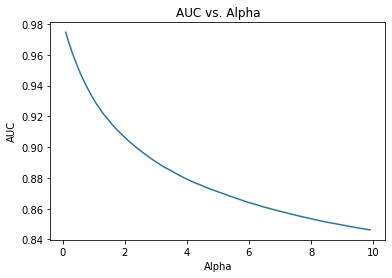

In [38]:
res = pd.Series([get_auc_CV(MultinomialNB(alpha = i))
                 for i in np.arange(0.1, 10, 0.1)],
                index=np.arange(0.1, 10, 0.1))

best_alpha = np.round(res.idxmax(), 2)
print('Best alpha: ', best_alpha)

plt.plot(res)
plt.title('AUC vs. Alpha')
plt.xlabel('Alpha')
plt.ylabel('AUC')
plt.show()

In [39]:
def evaluate_roc(probs, y_true):
    """
    - Print AUC and accuracy on the test set
    - Plot ROC
    @params    probs (np.array): an array of predicted probabilities with shape (len(y_true), 2)
    @params    y_true (np.array): an array of the true values with shape (len(y_true),)
    """
    preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_true, preds)
    roc_auc = auc(fpr, tpr)
    print(f'AUC: {roc_auc:.4f}')
       
    # Get accuracy over the test set
    y_pred = np.where(preds >= 0.5, 1, 0)
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy: {accuracy*100:.2f}%')
    
    # Plot ROC AUC
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

AUC: 0.9698
Accuracy: 94.18%


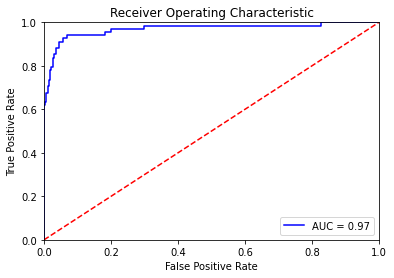

In [40]:
# Compute predicted probabilities
nb_model = MultinomialNB(alpha=best_alpha)
nb_model.fit(tfidf_train, y_train)
probs = nb_model.predict_proba(tfidf_validation)

# Evaluate the classifier
evaluate_roc(probs, y_val)

In [41]:
train_preds_nb = nb_model.predict(tfidf_train)
val_preds_nb = nb_model.predict(tfidf_validation)

train_f1_score_nb = f1_score(y_train, train_preds_nb)
val_f1_score_nb = f1_score(y_val, val_preds_nb)

train_accuracy_nb = accuracy_score(y_train, train_preds_nb)
val_accuracy_nb = accuracy_score(y_val, val_preds_nb)

In [42]:
print('Prediction accuracy for naive bayes model on train data:', round(train_accuracy_nb*100, 3))
print('Prediction accuracy for naive bayes model on validation data:', round(val_accuracy_nb*100, 3))

print()

print('F1 score for naive bayes model on train data:', round(train_f1_score_nb*100, 3))
print('F1 score for naive bayes model on validation data:', round(val_f1_score_nb*100, 3))

Prediction accuracy for naive bayes model on train data: 97.684
Prediction accuracy for naive bayes model on validation data: 94.183

F1 score for naive bayes model on train data: 92.099
F1 score for naive bayes model on validation data: 78.689


### Last
* Prediction accuracy for naive bayes model on train data: 96.494
* Prediction accuracy for naive bayes model on validation data: 90.411

* F1 score for naive bayes model on train data: 96.879
* F1 score for naive bayes model on validation data: 91.954



In [43]:
public_test = pd.read_csv('../public_test.csv')

In [44]:
!pwd

/Users/kristjan.roosild/kool/MachineLearning/projekt/ut-ml-adverse-media/Kristjan


In [45]:
public_test["article"] = public_test["title"] + " " + public_test["article"]
public_test = public_test.drop(["title"], axis =1)

In [46]:
public_test_lemmatized = public_test[['article', 'label']].copy()
public_test_lemmatized["article"] = public_test_lemmatized["article"].apply(lemmatize)
public_test_lemmatized = public_test_lemmatized.reset_index()
public_test_lemmatized = public_test_lemmatized.drop(['index'], axis=1)
public_test_lemmatized

tfidf_public_test = ngram_vectorizer.transform(public_test_lemmatized.article)

In [47]:
public_test_preds_nb = nb_model.predict(tfidf_public_test)

public_test_accuracy_nb = accuracy_score(public_test.label, public_test_preds_nb)

public_test_f1_score_nb = f1_score(public_test.label, public_test_preds_nb)


print('Prediction accuracy for naive bayes model on public test data:', round(public_test_accuracy_nb*100, 3))

print()

print('F1 score for naive bayes model on public test data:', round(public_test_f1_score_nb*100, 3))

Prediction accuracy for naive bayes model on public test data: 36.478

F1 score for naive bayes model on public test data: 3.81




Using Karl's cleaning and lemmatization, title added to article:

Prediction accuracy for naive bayes model on public test data: 90.566

F1 score for naive bayes model on public test data: 92.537


Original cleaned_lemmatized_text.csv for train and lemmatize func is :
Prediction accuracy for naive bayes model on public test data: 91.824

F1 score for naive bayes model on public test data: 93.467